In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_excel('rain_data.xlsx', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'rain_data.xlsx'

In [3]:
df.head()

,time,area1_average,area1_min,area1_max,area2_average,area2_min,area2_max,area3_average,area3_min,area3_max,...,area6_max,area7_average,area7_min,area7_max,area8_average,area8_min,area8_max,area9_average,area9_min,area9_max
0,201011271315,--,--,--,0.00004,0.00004,0.00004,0.000082,0.00004,0.00012,...,--,--,--,--,0.000047,--,--,0.000166,0.00004,0.00044
1,201010211630,--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
2,201010310000,--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
3,201011202345,--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
4,201009060300,--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [4]:
df1 = df.apply(pd.to_numeric, args=('coerce',))

In [5]:
df1 = df1.replace(np.nan, 0)

In [6]:
sums = {}

for i in range(9):
    sums['area{}_average'.format(i + 1)] = sum([i for i in df1['area{}_average'.format(i + 1)] if i != 0])
sums

{'area1_average': 0.1082745549920643,
 'area2_average': 0.1360735668271958,
 'area3_average': 0.11468287838666524,
 'area4_average': 0.11304386753884876,
 'area5_average': 0.11414369641334923,
 'area6_average': 0.09516194308954055,
 'area7_average': 0.07320295238095227,
 'area8_average': 0.08958528289997383,
 'area9_average': 0.1156625025378522}

In [7]:
df_sum = pd.DataFrame(columns=sums.keys())

In [8]:
df_sum = df_sum.append(sums, ignore_index=True)

In [9]:
df_sum = df_sum.transpose()

In [10]:
df_sum = df_sum.reset_index()

In [11]:
df_sum.columns = ['areas', 'rain']

In [12]:
df_sum

,areas,rain
0,area1_average,0.108275
1,area2_average,0.136074
2,area3_average,0.114683
3,area4_average,0.113044
4,area5_average,0.114144
5,area6_average,0.095162
6,area7_average,0.073203
7,area8_average,0.089585
8,area9_average,0.115663


Text(0, 0.5, 'instant rain kg/(m2.s)')

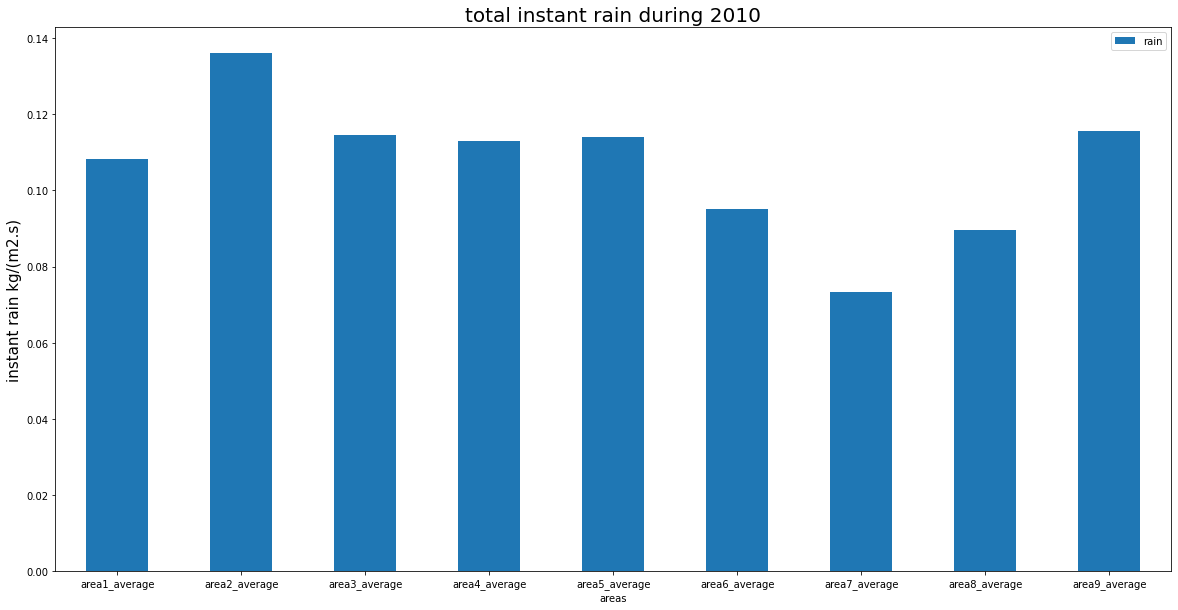

In [19]:
ax = df_sum.plot.bar(x='areas', y='rain', rot=0, figsize=(20, 10))
ax.set_title('total instant rain during 2010', fontsize=20)
ax.set_ylabel('instant rain kg/(m2.s)', fontsize=15)

In [21]:
maxs = []
labs = []
for i in range(9):
    maxs.append(np.average([i for i in df1['area{}_max'.format(i + 1)] if i != 0]))
    labs.append('area{}_max'.format(i + 1))
maxs, labs

([0.0004337190082644629,
  0.0005426966292134832,
  0.00047726495726495733,
  0.0004606211180124224,
  0.0005195107033639144,
  0.00046181818181818184,
  0.00034978102189781024,
  0.0004887022900763358,
  0.0006281918819188192],
 ['area1_max',
  'area2_max',
  'area3_max',
  'area4_max',
  'area5_max',
  'area6_max',
  'area7_max',
  'area8_max',
  'area9_max'])

In [22]:
df_max = pd.DataFrame({'areas': labs, 'maxs': maxs})

Text(0, 0.5, 'instant rain kg/(m2.s)')

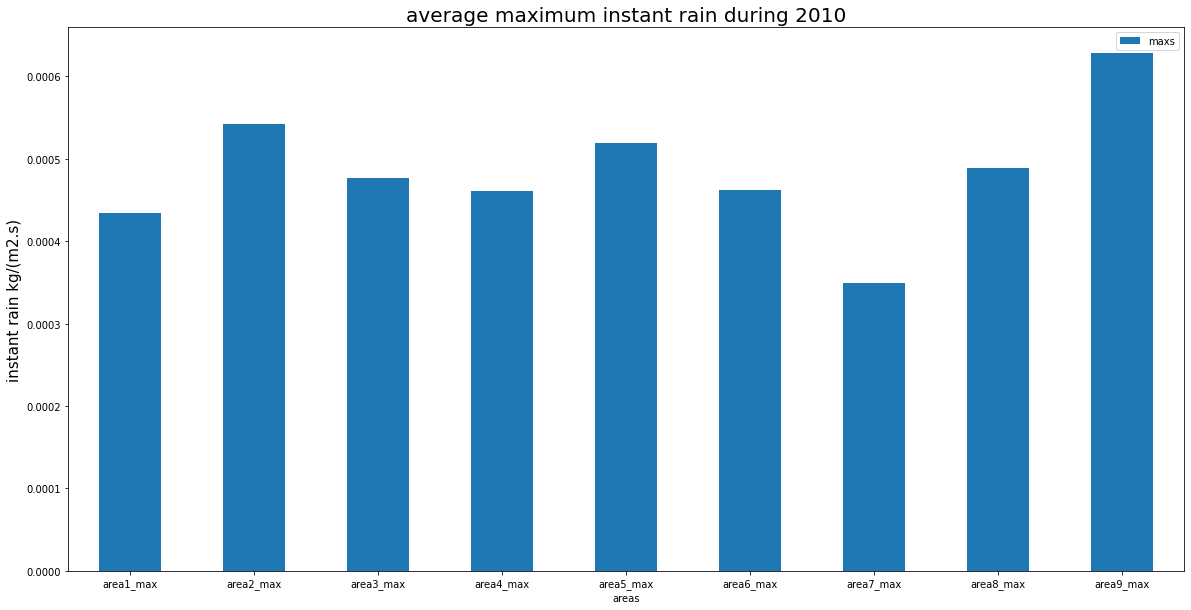

In [23]:
ax = df_max.plot.bar('areas', 'maxs', rot=0, figsize=(20, 10))
ax.set_title('average maximum instant rain during 2010', fontsize=20)
ax.set_ylabel('instant rain kg/(m2.s)', fontsize=15)

In [24]:
mins = []
labs = []
for i in range(9):
    mins.append(np.average([i for i in df1['area{}_average'.format(i + 1)] if i != 0]))
    labs.append('area{}_min'.format(i + 1))
mins, labs

([0.00014436607332275273,
  0.00016966778906134155,
  0.0001691487881809225,
  0.00016551078702613305,
  0.00014126695100662065,
  0.0001387200336582225,
  0.00019213373328333963,
  0.0001311643966324656,
  0.00014002724278190356],
 ['area1_min',
  'area2_min',
  'area3_min',
  'area4_min',
  'area5_min',
  'area6_min',
  'area7_min',
  'area8_min',
  'area9_min'])

In [25]:
df_min = pd.DataFrame({'areas': labs, 'mins': mins})

Text(0, 0.5, 'instant rain kg/(m2.s)')

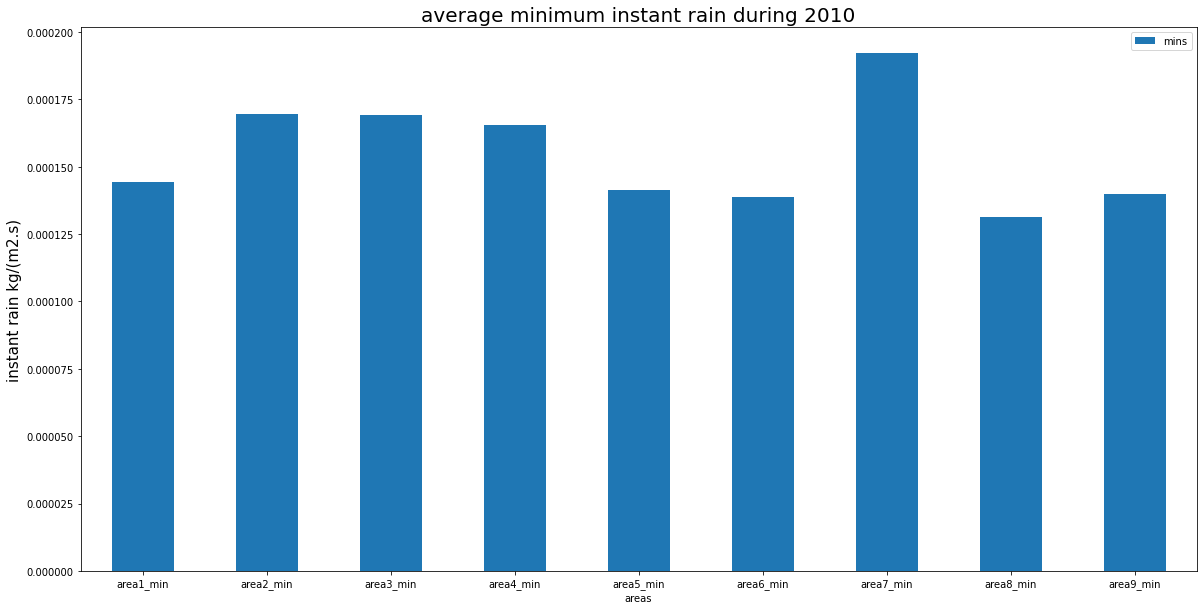

In [27]:
ax = df_min.plot.bar('areas', 'mins', rot=0, figsize=(20, 10))
ax.set_title('average minimum instant rain during 2010', fontsize=20)
ax.set_ylabel('instant rain kg/(m2.s)', fontsize=15)

In [121]:
df.describe()

,time
count,2.651000e+03
mean,2.010102e+11
std,8.123413e+05
min,2.010090e+11
25%,2.010092e+11
50%,2.010102e+11
75%,2.010111e+11
max,2.010113e+11


In [1]:
file = 'erosion_data/ero_rpr.shp'
# for layername in fiona.listlayers(file):
points = pd.DataFrame(columns=list('XY') + ['id'])
names = set()
with fiona.open(file) as src:
    while True:
        try:
            f = next(src)
            name = f['properties']['Name']
            name = name[:-4]
            names.add(name)
            poly = f['geometry']['coordinates']
            coordinates = poly[0][0]
            x = coordinates[0]
            y = coordinates[1]
            point = {'X': x, 'Y': y, 'id': name}
            points = points.append(point, ignore_index=True)
#             break
        except:
            break
# print(poly)
print(points)
points.to_csv('points_id.csv')

NameError: name 'pd' is not defined

In [61]:
import pandas as pd

In [62]:
df_erosion = pd.read_excel('erosion_data/erosion.ods', skiprows=5)

In [63]:
df_erosion

,id,erosion_protocol,area_ha_2010,area_ha_2009,area_ha_2008,plowing_2010,plowing_2009,plowing_2008,other_basic_cultivation_2010,other_basic_cultivation_2009,...,gully_erosion_2008,sedimentation_erosion_2010,sedimentation_erosion_2009,sedimentation_erosion_2008,other_erosion_2010,other_erosion_2009,other_erosion_2008,participation in AKG program 2010,participation in AKG program 2009,participation in AKG program 2008
0,02001/02,nem,21.9,21.9,21.9,igen,igen,igen,nem,nem,...,nem,nem,nem,nem,nem,nem,nem,3 - ökológiai szántóföldi növénytermesztési cé...,3 - ökológiai szántóföldi növénytermesztési cé...,5 - ökológiai szántóföldi növénytermesztési cé...
1,02001/03,nem,14.2,14.2,14.2,igen,nem,nem,igen,nem,...,nem,nem,nem,nem,nem,nem,nem,3 - ökológiai szántóföldi növénytermesztési cé...,3 - ökológiai szántóföldi növénytermesztési cé...,5 - ökológiai szántóföldi növénytermesztési cé...
2,02001/04,nem,22.0,22.0,22.0,igen,igen,igen,igen,nem,...,nem,nem,nem,nem,nem,nem,nem,3 - ökológiai szántóföldi növénytermesztési cé...,3 - ökológiai szántóföldi növénytermesztési cé...,5 - ökológiai szántóföldi növénytermesztési cé...
3,02001/06,nem,32.0,32.0,32.0,igen,nem,igen,nem,igen,...,nem,nem,nem,nem,nem,nem,nem,3 - ökológiai szántóföldi növénytermesztési cé...,3 - ökológiai szántóföldi növénytermesztési cé...,5 - ökológiai szántóföldi növénytermesztési cé...
4,02001/07,igen,23.2,23.2,23.2,igen,igen,igen,nem,nem,...,nem,nem,nem,nem,nem,nem,nem,3 - ökológiai szántóföldi növénytermesztési cé...,3 - ökológiai szántóföldi növénytermesztési cé...,5 - ökológiai szántóföldi növénytermesztési cé...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,20018/04,nem,56.0,56.0,56.0,nem,igen,igen,igen,nem,...,nem,igen,nem,igen,nem,nem,nem,1 - integrált szántóföldi növénytermesztési cé...,1 - integrált szántóföldi növénytermesztési cé...,1 - alapszintû szántóföldi célprogram
1878,20018/06,nem,13.3,13.3,13.3,igen,igen,igen,nem,igen,...,nem,nem,igen,nem,nem,nem,nem,1 - integrált szántóföldi növénytermesztési cé...,1 - integrált szántóföldi növénytermesztési cé...,1 - alapszintû szántóföldi célprogram
1879,20018/07,nem,10.9,10.9,10.9,igen,igen,igen,nem,igen,...,nem,nem,igen,nem,nem,nem,nem,1 - integrált szántóföldi növénytermesztési cé...,1 - integrált szántóföldi növénytermesztési cé...,1 - alapszintû szántóföldi célprogram
1880,20018/08,nem,15.5,15.5,15.5,nem,nem,igen,igen,igen,...,nem,nem,nem,nem,nem,nem,nem,1 - integrált szántóföldi növénytermesztési cé...,1 - integrált szántóföldi növénytermesztési cé...,1 - alapszintû szántóföldi célprogram


In [64]:
df_erosion.dtypes

id                                    object
erosion_protocol                      object
area_ha_2010                         float64
area_ha_2009                         float64
area_ha_2008                         float64
                                      ...   
other_erosion_2009                    object
other_erosion_2008                    object
participation in AKG program 2010     object
participation in AKG program 2009     object
participation in AKG program 2008     object
Length: 62, dtype: object

In [65]:
import json

In [66]:
with open('areas/areas.json') as file:
    areas = json.load(file)

In [67]:
areas['area1']

['05017/08', '05006/04', '05004/08', '05011/01', '05019/04', '05013/09']

In [68]:
a = []
for area, areas_list in areas.items():
    a += areas_list
a

['05017/08',
 '05006/04',
 '05004/08',
 '05011/01',
 '05019/04',
 '05013/09',
 '10009/03',
 '10007/07',
 '10002/06',
 '10015/01',
 '12009/01',
 '12008/01',
 '12004/08',
 '12007/11',
 '13006/09',
 '13004/03',
 '13001/16',
 '13016/06',
 '13022/12',
 '07003/17',
 '07015/12',
 '11003/12',
 '07019/01',
 '07022/01',
 '11006/07',
 '11011/06',
 '11017/04',
 '11010/06',
 '19004/04',
 '19006/07',
 '19012/13',
 '08004/01',
 '08004/04',
 '08017/19',
 '08005/21',
 '19016/02',
 '19007/18',
 '19009/01',
 '18018/10',
 '08021/21',
 '18013/02',
 '18015/06',
 '18002/15',
 '20002/05',
 '20003/02',
 '20008/24',
 '20001/02',
 '20010/06',
 '20007/03',
 '02020/13',
 '14009/01',
 '14007/02',
 '14018/08',
 '14005/10',
 '14001/07',
 '14015/05',
 '17007/01',
 '17015/01',
 '17016/18',
 '17019/08',
 '17002/07',
 '02001/07',
 '02009/05',
 '02017/30',
 '02015/05']

In [69]:
df = df_erosion.set_index('id')

In [70]:
df = df.loc[a]

In [71]:
areas_series = []
for i in df.index.values:
    for area, areas_list in areas.items():
        if i in areas_list:
            areas_series.append(area)
df['area'] = pd.Series(areas_series, index=df.index.values.tolist())

In [72]:
df = df.replace('igen', 1)
df = df.replace('nem', 0)

In [73]:
df.to_excel('erosion_data.xlsx')

In [58]:
!pip install openpyxl